<a href="https://colab.research.google.com/github/aakashagarwal6898/Emotion-Detection-using-Keras/blob/master/VGGFace_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!cp /content/drive/My\ Drive/CK_dataset_split_cropped.zip /content

In [0]:
import cv2
import os

!unzip ./CK_dataset_split_cropped.zip 
folder_path = "./CK_dataset_split_cropped"

for root, dirs, files in os.walk(folder_path, topdown=False):
    for file_name in files:
      image = cv2.imread(os.path.join(root,file_name))
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      cv2.imwrite(os.path.join(root,file_name),gray)

In [0]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
train_data_dir = "./CK_dataset_split_cropped/train"
datagen = ImageDataGenerator(rescale=1. / 255,
                             shear_range=0.3,
                             zoom_range=0.2,
                             horizontal_flip=True)
train_generator = datagen.flow_from_directory(train_data_dir,
                                              target_size=(224,224),
                                              batch_size=4,
                                              color_mode="rgb",
                                              class_mode='categorical')

Found 764 images belonging to 7 classes.


In [0]:
test_data_dir = "./CK_dataset_split_cropped/test"
datagen = ImageDataGenerator(rescale=1. / 255,
                             shear_range=0.3,
                             zoom_range=0.2,
                             horizontal_flip=True)
test_generator = datagen.flow_from_directory(test_data_dir,
                                             target_size=(224,224),
                                             batch_size=4,
                                             color_mode="rgb",
                                             class_mode='categorical')

Found 217 images belonging to 7 classes.


In [0]:
!pip install keras_vggface
from keras_vggface.vggface import VGGFace

vggmodel = VGGFace(model='vgg16', include_top=True)
vggmodel.summary()





580075520/580070376 [==============================] - 36s 0us/step






Model: "vggface_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________

In [0]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [0]:
X= vggmodel.layers[-2].output
predictions = Dense(7, activation="softmax")(X)
model_final = Model(input = vggmodel.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0 

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=7, verbose=1, mode='auto')
stats = model_final.fit_generator(generator= train_generator,epochs= 30, validation_data= test_generator, callbacks=[checkpoint,early])
model_final.save("emotion_prediction_vggface_5.h5")


Epoch 1/30
191/191 [==============================] - 13s 69ms/step - loss: 1.6901 - acc: 0.3455 - val_loss: 1.6483 - val_acc: 0.3825

Epoch 00001: val_acc improved from -inf to 0.38249, saving model to vgg16_1.h5
Epoch 2/30
191/191 [==============================] - 13s 68ms/step - loss: 1.6308 - acc: 0.4123 - val_loss: 1.5819 - val_acc: 0.4608

Epoch 00002: val_acc improved from 0.38249 to 0.46083, saving model to vgg16_1.h5
Epoch 3/30
191/191 [==============================] - 13s 68ms/step - loss: 1.5656 - acc: 0.5026 - val_loss: 1.5138 - val_acc: 0.5668

Epoch 00003: val_acc improved from 0.46083 to 0.56682, saving model to vgg16_1.h5
Epoch 4/30
191/191 [==============================] - 12s 65ms/step - loss: 1.4885 - acc: 0.5537 - val_loss: 1.4462 - val_acc: 0.6083

Epoch 00004: val_acc improved from 0.56682 to 0.60829, saving model to vgg16_1.h5
Epoch 5/30
191/191 [==============================] - 13s 67ms/step - loss: 1.4109 - acc: 0.5929 - val_loss: 1.3726 - val_acc: 0.6267



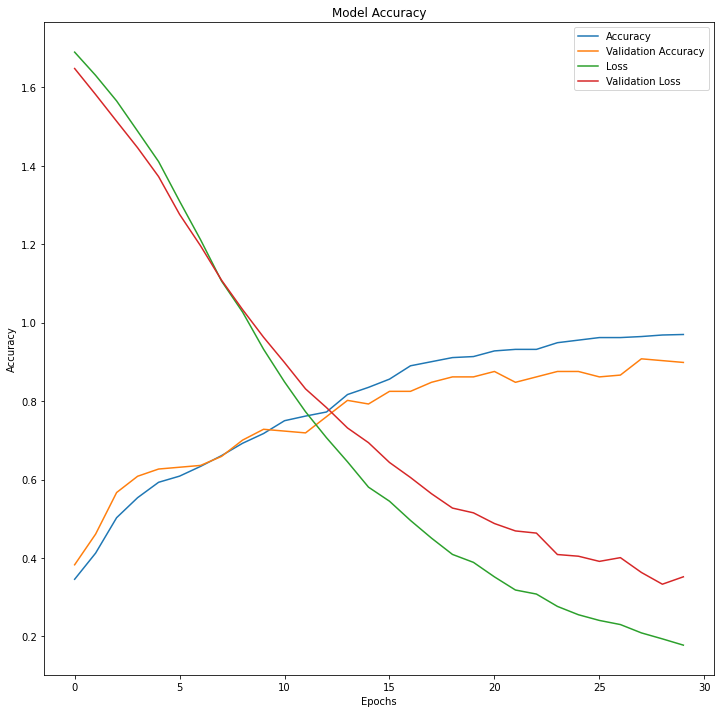

In [0]:
import matplotlib.pyplot as plt
plt.plot(stats.history["acc"])
plt.plot(stats.history['val_acc'])
plt.plot(stats.history['loss'])
plt.plot(stats.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size


plt.show()

In [2]:
!pip install mtcnn

from keras.models import load_model
!cp /content/drive/My\ Drive/VGG16-weights/emotion_prediction_vggface_5.h5 /content

model = load_model("./emotion_prediction_vggface_5.h5")


     |████████████████████████████████| 2.3MB 4.9MB/s 


Using TensorFlow backend.













Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
import numpy as np
from skimage import color

def highlight_faces(image_path):
  image = plt.imread(image_path)
  detector = MTCNN()
  faces = detector.detect_faces(image)
  plt.imshow(image)
  ax = plt.gca()
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 12
  fig_size[1] = 12
  plt.rcParams["figure.figsize"] = fig_size
  for face in faces: 
    if face['confidence'] > 0.95:
      x, y, width, height = face['box']
      cropped_face = extract_face(face,image)
      emotion_str = preprocess_otg(cropped_face)
      face_border = Rectangle((x, y), width, height,
                        fill=False, color=(1,0.859,0.604))
      plt.text(x , y , emotion_str,
                family="monospace",
                weight = "bold",
                color = "w", 
                bbox=dict(boxstyle="round",
                          fc=(1, 0.647, 0.004),
                          ec=(1, 0.647, 0.004)
                          ))
      ax.add_patch(face_border)
  plt.axis('off')
  plt.show()

def extract_face(face,image,required_size=(224,224)):

  x1, y1, width, height = face['box']
  x2, y2 = x1 + width, y1 + height
  face_boundary = image[y1:y2, x1:x2]
  face_image = Image.fromarray(face_boundary)
  face_image = face_image.resize(required_size)
  face_array = asarray(face_image)
  return face_array

def preprocess_otg(face_img):
  emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}
  image = rgb_gray(face_img)
  image = color.gray2rgb(image)
  image = image.reshape((1, 224, 224, 3))
  predicted_class = np.argmax(model.predict(image))
  label_map = dict((v,k) for k,v in emotion_dict.items()) 
  predicted_label = label_map[predicted_class]
  return predicted_label

def rgb_gray(face):
  img = color.rgb2gray(face)
  return img

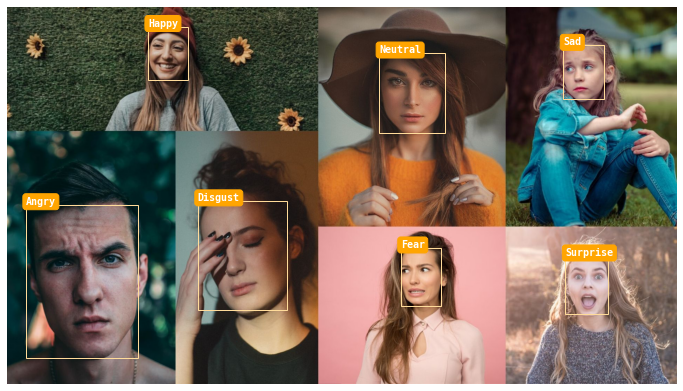

CPU times: user 11.3 s, sys: 83.5 ms, total: 11.4 s
Wall time: 11.4 s


In [55]:
input_image = "./sample_images/emotions.jpg"
highlight_faces(input_image)